In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = [
    "Book Value (2019-2022).xlsx",
    "Beta_2019-2022.xlsx",
    "trading_volumes_2019-2022.xlsx",
    "RVI.xlsx",
    "prices_with_IMOEX__2019-2022.xlsx",
    "BV_to_Mkt_Cap(2019-2022).xlsx"
]



In [29]:
book = pd.read_excel("data/Book Value (2019-2022).xlsx")
book = book.set_index('Date')
book.index = pd.to_datetime(book.index)

In [30]:
beta = pd.read_excel("data/Beta_2019-2022.xlsx")
beta = beta.set_index('Date')
beta.index = pd.to_datetime(beta.index)

In [31]:
volumes = pd.read_excel("data/trading_volumes_2019-2022.xlsx")
volumes = volumes.set_index('Date')
volumes.index = pd.to_datetime(volumes.index)

In [75]:
rvi = pd.read_excel("data/RVI.xlsx")
rvi = rvi.rename(columns={"Дата": "Date", "Изменение индекса RVI": "RVI"})
rvi = rvi.set_index('Date')
rvi.index = pd.to_datetime(rvi.index)

In [34]:
prices = pd.read_excel("data/prices_with_IMOEX__2019-2022.xlsx")
prices = prices.set_index('Date')
prices.index = pd.to_datetime(prices.index)

In [35]:
bvcap = pd.read_excel("data/BV_to_Mkt_Cap(2019-2022).xlsx")
bvcap = bvcap.set_index('Date')
bvcap.index = pd.to_datetime(bvcap.index)

# 1.1 удалении или нормировки жирных хвостов/выбросов

In [49]:
ts = prices['ALRS.ME']

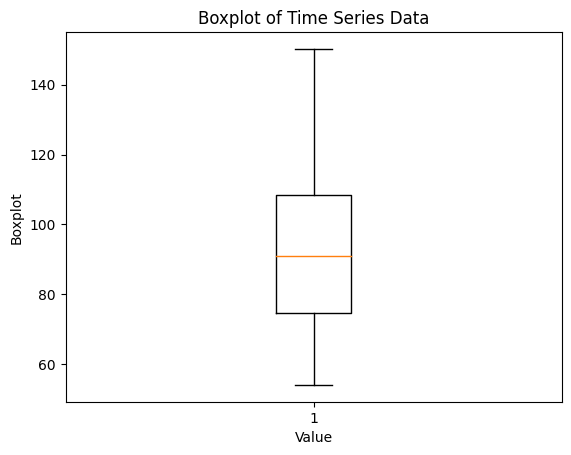

In [50]:

plt.boxplot(ts)

# Настройка осей и названий
plt.xlabel('Value')
plt.ylabel('Boxplot')
plt.title('Boxplot of Time Series Data')

# Отображение графика
plt.show()

In [51]:
prices.head(2)

,ALRS.ME,CHMF.ME,GAZP.ME,GMKN.ME,LKOH.ME,MGNT.ME,MTSS.ME,NLMK.ME,NVTK.ME,ROSN.ME,...,TGKD.ME,TRMK.ME,TTLK.ME,UWGN.ME,VSMO.ME,VTBR.ME,MSST.ME,RKKE.ME,NKNC.ME,IMOEX.ME
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,99.989998,934.200012,156.279999,13381.202148,5007.0,3576.0,240.500000,157.339996,1118.199951,425.850006,...,0.00284,54.599998,0.1784,400.600006,15580,0.03421,2.3705,5996.290527,65.000000,2375.600098
2019-01-04,101.550003,949.700012,159.149994,13460.502930,5074.5,3600.0,248.600006,155.679993,1138.800049,430.399994,...,0.00287,55.000000,0.1786,398.600006,15600,0.03462,2.3880,5979.109375,65.199997,2406.500000


In [67]:
ts = prices['ALRS.ME']

def processing(ts):

    # Определение выбросов
    # используем метод межквартильного размаха для определения выбросов
    Q1 = ts.quantile(0.25)
    Q3 = ts.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтрация выбросов
    filtered_data = ts[(ts >= lower_bound) & (ts <= upper_bound)]



    # сглаживание к исходным данным
    smoothed_data = ts.rolling(window=10, center=True).mean()

    # Фильтрованные данные # Сглаженные данные
    return filtered_data, smoothed_data


In [68]:
filtered_data, smoothed_data = processing(ts)
filtered_data.head()

Date
2019-01-03     99.989998
2019-01-04    101.550003
2019-01-08     98.650002
2019-01-09    101.400002
2019-01-10    102.949997
Name: ALRS.ME, dtype: float64

In [59]:
smoothed_data.head(14)

Date
2019-01-03           NaN
2019-01-04           NaN
2019-01-08           NaN
2019-01-09           NaN
2019-01-10           NaN
2019-01-11    102.340000
2019-01-14    102.691000
2019-01-15    102.791000
2019-01-16    102.926000
2019-01-17    102.846000
2019-01-18    102.651000
2019-01-21    102.315000
2019-01-22    101.796001
2019-01-23    101.114001
Name: ALRS.ME, dtype: float64

# 1.2 Мы будем использовать тест Дики-Фуллера для определения стационарности временных рядов.

Понятие стационарного временного ряда означает, что его среднее значение не изменяется во времени, т. е. временной ряд не имеет тренда.

Если p-значение меньше 0.05 и статистика теста меньше критического значения для уровня значимости 1%, то выводится сообщение "Временной ряд является стационарным". В противном случае выводится сообщение "Временной ряд не является стационарным". Это предполагает, что уровень значимости для проверки стационарности установлен равным 0.05 и используется критическое значение для уровня значимости 1%.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [61]:
# Определение стационарности с помощью теста Дики-Фуллера
result = adfuller(ts)

# Извлечение значений статистики и критических значений
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Вывод результатов
print('Тест Дики-Фуллера:')
print(f'Статистика теста: {test_statistic}')
print(f'p-значение: {p_value}')
print('Критические значения:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

# Проверка стационарности временного ряда
if p_value < 0.05 and test_statistic < critical_values['1%']:
    print('Временной ряд является стационарным')
else:
    print('Временной ряд не является стационарным')

Тест Дики-Фуллера:
Статистика теста: -1.0616882033544217
p-значение: 0.7301059919083438
Критические значения:
1%: -3.438882201132452
5%: -2.865305765357574
10%: -2.568775270215655
Временной ряд не является стационарным


# lets merge everyting for one ticker into dataframe

In [92]:
time_series_1, token = processing(book['ALRS'])
time_series_2, token = processing(beta['ALRS'])
time_series_3, token = processing(volumes['ALRS'])
time_series_4, token = processing(rvi['RVI'])
time_series_5, token = processing(prices['ALRS.ME'])
time_series_6, token = processing(bvcap['ALRS'])

In [93]:
# Объединение временных рядов по дате (внешнее объединение, чтобы сохранить все даты)
merged_data = pd.merge(time_series_1, time_series_2, on='Date', how='outer')
merged_data = pd.merge(merged_data, time_series_3, on='Date', how='outer')
merged_data = pd.merge(merged_data, time_series_4, on='Date', how='outer')
merged_data = pd.merge(merged_data, time_series_5, on='Date', how='outer')
merged_data = pd.merge(merged_data, time_series_6, on='Date', how='outer')

# Приведение к единому временному окну
merged_data = merged_data.dropna()  # Заполнение пропущенных значений нулями

# Сортировка по дате
merged_data = merged_data.sort_values('Date')


/var/folders/xd/xm863f553v750zss70sl77sc0000gn/T/ipykernel_3578/3916290000.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ALRS_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = pd.merge(merged_data, time_series_6, on='Date', how='outer')


In [94]:
# Вывод обработанных данных
df = merged_data.set_axis(['book', 'beta', 'volumes', 'rvi','price', 'bvcap'], axis=1)
df.head()

,book,beta,volumes,rvi,price,bvcap
Date,,,,,,
2019-10-01,6.244754e+11,0.188846,8678900.0,-0.026763,74.349998,1.140417
2019-10-02,6.244754e+11,0.209185,16484860.0,0.056189,75.080002,1.129329
2019-10-03,6.244754e+11,0.209171,16419570.0,0.057211,75.339996,1.125431
2019-10-04,6.244754e+11,0.218077,14009140.0,-0.054858,74.099998,1.144265
2019-10-07,6.244754e+11,0.142140,16155270.0,-0.036368,72.250000,1.173564


In [124]:
df.tail()

,book,beta,volumes,rvi,price,bvcap,intercept
Date,,,,,,,
2021-12-21,8.946224e+11,0.603313,20774260.0,-0.051036,113.300003,1.072109,1
2022-01-06,8.946224e+11,0.601993,20492090.0,-0.001643,118.650002,1.023767,1
2022-01-11,8.946224e+11,0.593247,24350890.0,-0.036096,121.300003,1.001401,1
2022-01-12,8.946224e+11,0.533479,21948900.0,-0.009461,119.470001,1.016741,1
2022-01-13,8.946224e+11,0.552093,37543170.0,0.097232,118.480003,1.025236,1


In [123]:
df.describe()

,book,beta,volumes,rvi,price,bvcap,intercept
count,4.500000e+02,450.000000,4.500000e+02,450.000000,450.000000,450.000000,450.0
mean,7.493286e+11,0.237334,2.002857e+07,-0.002852,97.611978,1.052077,1.0
std,1.878776e+11,0.136189,8.447627e+06,0.038974,27.043705,0.090724,0.0
min,4.559650e+11,0.015540,3.494030e+06,-0.105644,59.240002,0.847840,1.0
25%,5.393364e+11,0.142781,1.377746e+07,-0.027527,71.674999,0.995163,1.0
50%,7.887878e+11,0.206945,1.848787e+07,-0.003069,98.064999,1.041171,1.0
75%,9.838858e+11,0.299515,2.524586e+07,0.020919,125.227499,1.107800,1.0
max,9.882311e+11,0.603313,4.370180e+07,0.101129,150.270004,1.289292,1.0


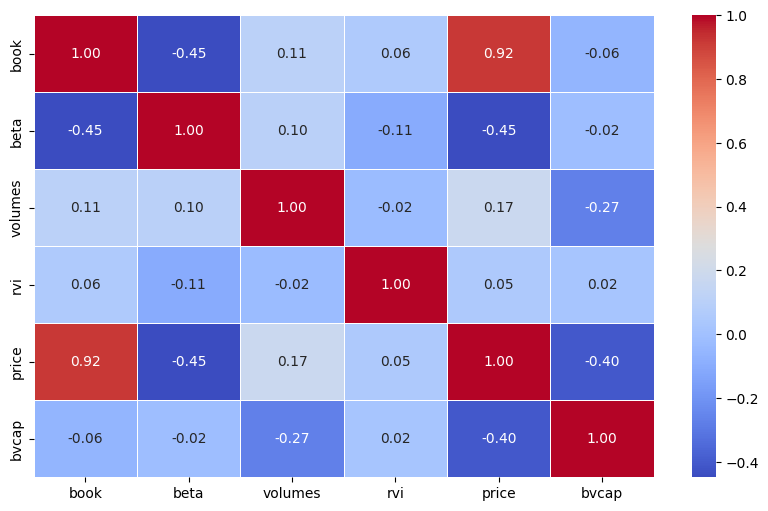

In [170]:
import seaborn as sns
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 6))

colormap = sns.color_palette("coolwarm" , as_cmap=True ) #"Reds" "tab10" "vlag"

sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap=colormap,  ax=ax) #cmap='coolwarm' cmap="crest",
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [172]:
df.corr()

,book,beta,volumes,rvi,price,bvcap
book,1.000000,-0.435446,0.114905,0.069782,0.941302,-0.064901
beta,-0.435446,1.000000,0.151807,-0.130404,-0.396286,-0.070379
volumes,0.114905,0.151807,1.000000,-0.027108,0.187649,-0.264214
rvi,0.069782,-0.130404,-0.027108,1.000000,0.057347,0.025119
price,0.941302,-0.396286,0.187649,0.057347,1.000000,-0.389291
bvcap,-0.064901,-0.070379,-0.264214,0.025119,-0.389291,1.000000



- 'book' (балансовая стоимость эмитента) имеет положительную корреляцию с 'price' (цены акции), что может указывать на то, что более высокая балансовая стоимость эмитента соответствует более высокой цене акции.

- 'beta' (рыночная бета по акции) имеет положительную корреляцию с 'book' (балансовой стоимостью эмитента) и 'price' (ценой акции), что может указывать на связь между риском акции (выраженным через бета) и балансовой стоимостью эмитента.

- 'volumes' (объемы торгов) имеет слабую положительную корреляцию с 'beta' (рыночной бетой по акции) и 'book' (балансовой стоимостью эмитента), что может указывать на то, что более высокие объемы торгов могут быть связаны с более высокой рыночной бетой и балансовой стоимостью эмитента.

- 'rvi' (динамика индекса страха RVI) имеет слабую положительную корреляцию с 'beta' (рыночной бетой по акции) и 'price' (ценой акции), что может указывать на то, что повышение индекса страха может быть связано с повышением рыночной беты и цены акции.

- 'bvcap' (отношение балансовой стоимости эмитента к ее рыночной стоимости) имеет слабую положительную корреляцию с 'volumes' (объемами торгов), что может указывать на связь между отношением балансовой и рыночной стоимостей эмитента и объемами торгов.



# 2.

STRUCTURAL BREAKS DETECTION.

When we refer to the structural breaks (bifurcations, change points) we connote points of time series data where happens a significant shift in statistical properties. Identification of such breaks is important to obtaining better understanding regarding the nature of data depen- dencies and properties. The branch of mathematical theories and studies colluded in the theory of catastrophes, which addresses the way dramatic changes occur due to slight changes of input parameters. It found its usage in variety of fields including finance and economics.

The PELT (Pruned Exact Linear Time) method is a an algorithm for detecting structural breaks detections. It is known for efficiency and ability to provide exact solutions.

PELT starts by considering each data point as a potential candidate for a changing point. It assigns a cost to each candidate based on the likelihood of that point being a changing point. It then iterates through the data points in a specific order, calculating the cost of each candidate based on a statistical criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC). At each iteration, PELT prunes the candidates by eliminating those with higher costs, keeping only the most promising ones. This pruning process helps in reducing the computational complexity of the algorithm. PELT maintains a set of intervals representing the potential changing points. It updates these intervals as it progresses through the data, merging adjacent intervals if they have similar costs. The algorithm continues iterating through the data points until it reaches the end, evaluating all possible intervals. Finally, it selects the interval or intervals with the lowest cost as the detected structural breaks.

In [95]:
import ruptures as rpt
ts = df['price']
y = np.array(ts.tolist())

algo = rpt.Pelt(model="rbf")
algo.fit(y)
breaks = algo.predict(pen=3)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(ts.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

DatetimeIndex(['2020-03-04', '2020-09-11', '2020-11-11', '2020-12-24',
               '2021-04-16', '2021-06-08', '2021-12-08', '2022-01-13'],
              dtype='datetime64[ns]', freq=None)

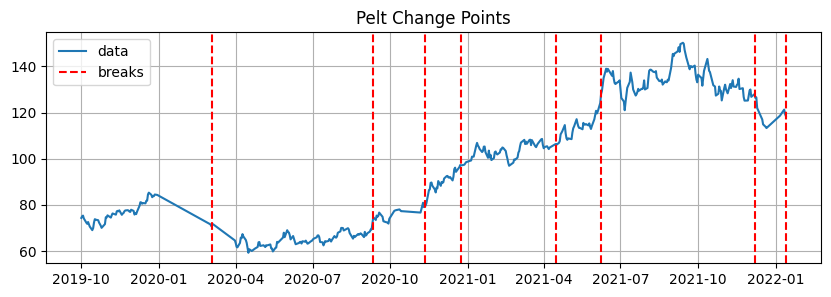

In [96]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)

plt.plot(ts, label='data')
plt.title('Pelt Change Points')

print_legend = True

for i in breaks_rpt:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')

plt.grid()
plt.legend()
plt.show()

# Seasonality

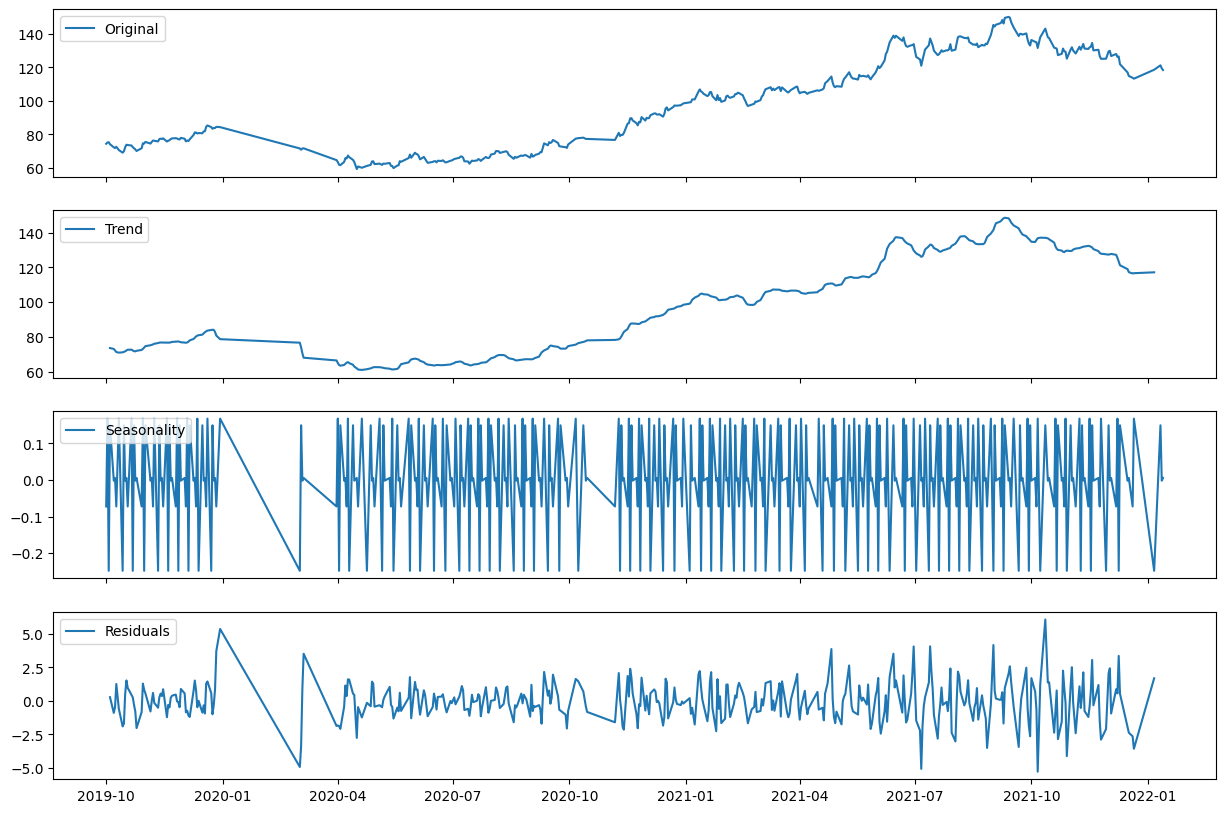

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive = df['price']

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

# 2.2 МНК оценка.

Для построения МНК-регрессии с использованием инструментальных переменных мы будем проводить необходимые тесты для определения наилучшей спецификации модели с
фиксированными или случайными эффектами, а также достижения наиболее
эффективных и состоятельных оценок.

А именно построения МНК-регрессии с использованием инструментальных переменных (IV) будем использовать linearmodels.

In [129]:
import numpy as np
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

# copy initial df
data = df

# Определение эндогенных и инструментальных переменных
endogenous_vars = ['price', 'volumes'] # why not
instrumental_vars = ['book']

# Добавление константы к данным
data['intercept'] = 1

# МНК-регрессия с инструментальными переменными
model_iv = PanelOLS(data[endogenous_vars], data[instrumental_vars + ['intercept']])
results_iv = model_iv.fit()

# Вывод результатов МНК-регрессии
print("Результаты МНК-регрессии:")
print(results_iv)

# Интерпретация результатов
print("Интерпретация результатов:")
print("Коэффициенты регрессии:")
print(results_iv.params)
print("\nСтатистическая значимость коэффициентов:")
print(results_iv.pvalues)
print("\nR-квадрат (коэффициент детерминации):")
print(results_iv.rsquared)



Результаты МНК-регрессии:
                          PanelOLS Estimation Summary                           
Dep. Variable:                    Dep   R-squared:                     2.154e-11
Estimator:                   PanelOLS   R-squared (Between):           2.375e-11
No. Observations:                 900   R-squared (Within):            9.069e-12
Date:                Sat, Jun 24 2023   R-squared (Overall):           2.154e-11
Time:                        20:13:46   Log-likelihood                -1.617e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.936e-08
Entities:                           2   P-value                           0.9999
Avg Obs:                       450.00   Distribution:                   F(1,899)
Min Obs:                       450.00                                           
Max Obs:                       450.00   F-statistic (robust):          1.936e-08
  

Результаты МНК-регрессии показывают следующее:

- Коэффициент регрессии для переменной Exog составляет 1.305745e-10. Это означает, что при увеличении Exog на единицу, ожидается увеличение зависимой переменной на значение коэффициента.

- Статистическая значимость коэффициента Exog составляет 0.999889, что говорит о том, что коэффициент статистически незначим на уровне значимости 0.05. Это означает, что нет статистически достоверных доказательств о влиянии переменной Exog на зависимую переменную.

- R-квадрат (коэффициент детерминации) равен 2.1538992811542812e-11. Это очень низкое значение, близкое к нулю. Оно указывает на то, что модель объясняет очень малую долю изменчивости зависимой переменной с помощью регрессоров.

Общий вывод состоит в том, что по результатам данной МНК-регрессии переменная Exog не оказывает статистически значимого влияния на зависимую переменную. Коэффициент детерминации также указывает на то, что модель плохо объясняет изменчивость зависимой переменной с использованием предложенных регрессоров. Возможно, необходимо пересмотреть модель и/или добавить другие регрессоры для получения более существенных результатов.

# 3.

Обобщенный метод моментов (ОММ) является статистическим методом оценки параметров модели с использованием моментных условий. ОММ особенно полезен при анализе динамических панельных данных, так как позволяет учесть эндогенность, автокорреляцию и гетероскедастичность в данных.

В контексте временных данных ОММ может быть применен для моделирования зависимости между текущим значением переменной и ее прошлыми значениями, учитывая динамику и эндогенность. Варианты модели ОММ, которые могут быть рассмотрены, включают:

1. ОММ с инструментальными переменными (IV-GMM): Этот подход использует инструменты, которые являются экзогенными и коррелированы с эндогенными регрессорами. IV-GMM позволяет устранить проблему эндогенности и получить состоятельные оценки параметров.

2. ОММ с фиксированными эффектами (FE-GMM): Этот подход учитывает индивидуальные эффекты (фиксированные эффекты) в данных путем добавления фиктивных переменных для каждой индивидуальной единицы. FE-GMM позволяет контролировать индивидуальную специфику и получить состоятельные оценки параметров.

3. ОММ с случайными эффектами (RE-GMM): В этом случае индивидуальные эффекты рассматриваются как случайные переменные с определенными распределениями. RE-GMM позволяет моделировать случайные различия между индивидуальными единицами и получить эффективные оценки параметров.

Выбор определенной модели ОММ зависит от природы данных, гипотез, которые требуется проверить, и предположений о структуре данных. Для выбора наиболее подходящей модели ОММ можно использовать различные тесты, такие как тест Хаусмана для сравнения FE-GMM и RE-GMM, тесты инструментальных переменных для проверки релевантности инструментов в IV-GMM и т.д.

При оценке регрессоров в ОММ используются инструменты, которые должны удовлетворять условиям релевантности, экзогенности и инструментальной релевантности

# 4.

Эндогенность переменных: Эндогенность означает, что объясняющая переменная в модели взаимодействует с ошибкой модели, что может привести к некорректным оценкам параметров. Проблема эндогенности может возникнуть, если объемы торгов или другие переменные влияют как на цены акций, так и на ошибку модели. В таком случае, использование инструментальных переменных или методов, таких как двухшаговый МНК, может помочь решить проблему эндогенности.


In [147]:
from pmdarima import auto_arima

data = df


# Подбор оптимальных значений p и q
model = auto_arima(data['price'], seasonal=False, trace=True)

# Вывод оптимальных значений
print("Оптимальные значения p и q:", model.order)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1900.778, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1902.137, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1901.124, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1901.389, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1901.216, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1902.965, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1903.534, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1902.885, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1902.817, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1903.447, Time=0.06 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1904.474, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1899.750, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1

In [148]:
p, d, q = 2, 1, 2

In [154]:
from pmdarima.arima import ARIMA

# Загрузка данных
data = df

order = (p, d, q)
model = ARIMA(order=order)

# Обучение модели
model.fit(data['price'])

# Вывод результатов
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  450
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -951.038
Date:                Sat, 24 Jun 2023   AIC                           1914.076
Time:                        20:58:50   BIC                           1938.732
Sample:                             0   HQIC                          1923.794
                                - 450                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5215      0.654      0.798      0.425      -0.759       1.802
ar.L1          0.6635      0.435      1.526      0.127      -0.189       1.516
ar.L2          0.3311      0.432      0.766      0.4

/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Результаты модели SARIMAX представлены в таблице. Давайте интерпретируем основные показатели:

1. Коэффициенты:
   - Коэффициент "intercept" (свободный член) равен 0.5215. Это значение указывает на начальное значение зависимой переменной, когда все остальные предикторы равны нулю.
   - Коэффициенты AR (авторегрессии) указаны как "ar.L1" и "ar.L2". Значение "ar.L1" равно 0.6635, а "ar.L2" равно 0.3311. Эти коэффициенты описывают взаимосвязь текущего значения зависимой переменной с предыдущими значениями.
   - Коэффициенты MA (скользящего среднего) указаны как "ma.L1" и "ma.L2". Значение "ma.L1" равно 0.4205, а "ma.L2" равно 0.1043. Эти коэффициенты описывают взаимосвязь текущего значения зависимой переменной с предыдущими остатками.

2. Стандартные ошибки:
   - Стандартные ошибки (std err) представляют оценку неопределенности коэффициентов. Чем меньше стандартная ошибка, тем более точна оценка коэффициента.

3. Z-статистики и P-значения:
   - Z-статистика (z) и P-значение (P>|z|) используются для проверки статистической значимости коэффициентов. Если P-значение меньше выбранного уровня значимости (обычно 0.05), то можно сделать вывод о статистической значимости коэффициента. В данной модели, некоторые коэффициенты имеют P-значения больше 0.05, что говорит о их нестатистической значимости.

4. Коэффициенты автокорреляции и автокорреляции скользящего среднего:
   - Модель SARIMAX использует как авторегрессию (AR), так и скользящее среднее (MA). Значения коэффициентов AR и MA указывают на наличие автокорреляции в данных. Значения близкие к нулю могут указывать на отсутствие автокорреляции.



Модель SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) является мощным инструментом для анализа и прогнозирования временных рядов. Вот несколько причин, почему SARIMAX является хорошим выбором:

1. Учет сезонности: SARIMAX учитывает сезонные колебания в данных, что позволяет моделировать и прогнозировать повторяющиеся шаблоны и тренды. Это особенно полезно при работе с данными, которые имеют явные сезонные компоненты, такие как ежемесячные или ежегодные данные.

2. Возможность включения экзогенных переменных: SARIMAX позволяет включать в модель дополнительные факторы, которые могут влиять на зависимую переменную. Это особенно полезно, когда вам известны или хотите использовать внешние переменные, которые могут объяснить часть вариации в данных.

3. Гибкость в моделировании различных временных рядов: SARIMAX позволяет работать с широким спектром временных рядов, включая стационарные и нестационарные ряды, ряды с трендами, сезонными компонентами и остаточной автокорреляцией. Это делает SARIMAX универсальным инструментом для моделирования разнообразных временных рядов.

4. Учет структуры ошибок: SARIMAX учитывает структуру ошибок и автокорреляцию остатков, что позволяет более точно моделировать зависимости в данных и получать более эффективные оценки параметров.

5. Прогнозирование: SARIMAX позволяет делать прогнозы на основе модели и оценок параметров. Это позволяет получать предсказания будущих значений временного ряда, что является важной задачей во многих областях, таких как финансы, экономика и др.


# 5.

GARCH (Generalized Autoregressive Conditional Heteroskedasticity), EGARCH (Exponential GARCH) и TGARCH (Threshold GARCH) - это модели, используемые для анализа и прогнозирования волатильности финансовых временных рядов. Вот краткое описание каждой из этих моделей и их уникальных особенностей:

1. GARCH (Generalized Autoregressive Conditional Heteroskedasticity):
   GARCH модель является расширением классической ARCH модели и используется для моделирования условной гетероскедастичности во временных рядах. GARCH модель учитывает зависимость текущей волатильности от прошлых значений ошибок модели. Основная идея заключается в том, что волатильность ряда зависит от квадрата прошлых ошибок, а не просто от их значения.

2. EGARCH (Exponential GARCH):
   EGARCH модель является расширением GARCH модели, которая учитывает асимметрию и устойчивость волатильности во временных рядах. Она позволяет моделировать условную волатильность, учитывая влияние отрицательных и положительных инноваций на волатильность. EGARCH модель также позволяет оценивать параметры, которые указывают на наличие асимметричного эффекта.

3. TGARCH (Threshold GARCH):
   TGARCH модель является расширением GARCH модели с учетом порогового значения (threshold). Она позволяет учитывать наличие различных режимов волатильности, которые могут изменяться в зависимости от условий рынка или других факторов. Пороговое значение определяет переключение между различными режимами волатильности. Таким образом, TGARCH модель может быть полезна для моделирования скачков волатильности во временных рядах.

Каждая из этих моделей имеет свои особенности и применяется в различных ситуациях. GARCH модель широко используется для анализа финансовых временных рядов и моделирования условной волатильности. EGARCH модель полезна при наличии асимметричности во временных рядах и для анализа влияния отрицательных и положительных инноваций на волатильность. TGARCH модель подходит для моделирования различных режимов волатильности и учета скачков во временных рядах.


In [158]:
import arch

# Предобработка данных
returns = df['price'].pct_change().dropna()  # Расчет доходности активов
returns = returns * 100  # Приведение доходности к процентному формату

# Построение модели GARCH(1, 1)
model = arch.arch_model(returns, vol='Garch', p=1, q=1)

# Обучение модели
result = model.fit()

# Вывод результатов
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126255.78294643105
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1154.2132281303768
Iteration:      3,   Func. Count:     22,   Neg. LLF: 953.9374332057957
Iteration:      4,   Func. Count:     30,   Neg. LLF: 952.0103421508095
Iteration:      5,   Func. Count:     37,   Neg. LLF: 951.60081931501
Iteration:      6,   Func. Count:     43,   Neg. LLF: 951.5960533840848
Iteration:      7,   Func. Count:     47,   Neg. LLF: 951.596053384342
Optimization terminated successfully    (Exit mode 0)
            Current function value: 951.5960533840848
            Iterations: 7
            Function evaluations: 47
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihoo

На основании результатов модели GARCH можно сделать следующие выводы о волатильности рассматриваемых ценных бумаг:

1. Модель GARCH описывает условную волатильность ценных бумаг, учитывая зависимость от прошлых значений ошибок модели.
2. Коэффициенты модели указывают на статистическую значимость различных параметров:
   - Коэффициент mu (mu=0.1443) представляет постоянную составляющую в модели, которая описывает среднее значение временного ряда ценных бумаг.
   - Коэффициенты omega (omega=0.4034), alpha (alpha[1]=0.0241) и beta (beta[1]=0.8786) отражают параметры модели волатильности.
3. Значение omega указывает на уровень начальной волатильности и оценивается как 0.4034.
4. Коэффициент alpha (alpha[1]) описывает влияние предыдущей ошибки модели на текущую волатильность. В данном случае, значение alpha не является статистически значимым (p-value=0.320), что может указывать на отсутствие асимметричности волатильности.
5. Коэффициент beta (beta[1]) отражает влияние предыдущей условной волатильности на текущую волатильность. Значение beta (beta[1]=0.8786) является статистически значимым и положительным, что указывает на наличие положительной зависимости между предыдущей и текущей волатильностью.
6. Логарифмическая функция правдоподобия (Log-Likelihood) модели равна -951.596, что является мерой соответствия модели исходным данным.
7. Критерии информационного обоснования (AIC, BIC) позволяют сравнивать модели с разным количеством параметров. В данном случае, AIC равно 1911.19, а BIC равно 1927.62.

Общий вывод заключается в том, что модель GARCH может быть использована для анализа и прогнозирования волатильности рассматриваемых ценных бумаг. Результаты моделирования позволяют оценить начальный уровень волатильности (omega) и влияние предыдущей волатильности на текущую (beta), что помогает понять особенности временного ряда и его динамику.

In [159]:
# Предобработка данных
returns = df['price'].pct_change().dropna()  # Расчет доходности активов
returns = returns * 100  # Приведение доходности к процентному формату

# Построение модели EGARCH(1, 1)
model = arch.arch_model(returns, vol='EGarch', p=1, q=1)

# Обучение модели
result = model.fit()

# Вывод результатов
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3792.965158069075
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1031.0826721277322
Iteration:      3,   Func. Count:     23,   Neg. LLF: 975.4896310797635
Iteration:      4,   Func. Count:     30,   Neg. LLF: 950.408960196748
Iteration:      5,   Func. Count:     35,   Neg. LLF: 955.5354905783524
Iteration:      6,   Func. Count:     48,   Neg. LLF: 3636.4485564159036
Iteration:      7,   Func. Count:     56,   Neg. LLF: 347973581.5538032
Iteration:      8,   Func. Count:     63,   Neg. LLF: 1008.9864154403427
Iteration:      9,   Func. Count:     69,   Neg. LLF: 1137.3662665689021
Iteration:     10,   Func. Count:     75,   Neg. LLF: 148728912.00299868
Iteration:     11,   Func. Count:     81,   Neg. LLF: 292575713.9040136
Iteration:     12,   Func. Count:     89,   Neg. LLF: 120364622.58351494
Iteration:     13,   Func. Count:     95,   Neg. LLF: 954.466164274409
Iteration:     14,   Func. Count:    101,   Neg. LLF: 198080

На основании результатов модели EGARCH можно сделать следующие выводы о волатильности рассматриваемых ценных бумаг:

1. Модель EGARCH также описывает условную волатильность ценных бумаг, учитывая зависимость от прошлых значений ошибок модели.
2. Коэффициенты модели указывают на статистическую значимость различных параметров:
   - Коэффициент mu (mu=0.1136) представляет постоянную составляющую в модели, которая описывает среднее значение временного ряда ценных бумаг.
   - Коэффициенты omega (omega=0.0257), alpha (alpha[1]=-0.0907) и beta (beta[1]=0.9790) отражают параметры модели волатильности.
3. Значение omega указывает на уровень начальной волатильности и оценивается как 0.0257.
4. Коэффициент alpha (alpha[1]) описывает влияние предыдущей ошибки модели на текущую волатильность. Значение alpha является статистически значимым (p-value=0.000) и отрицательным, что указывает на присутствие асимметричности волатильности. Отрицательный знак alpha указывает на то, что отрицательные инновации (шоки) имеют более сильное влияние на волатильность, чем положительные инновации.
5. Коэффициент beta (beta[1]) отражает влияние предыдущей условной волатильности на текущую волатильность. Значение beta (beta[1]=0.9790) является статистически значимым и положительным, что указывает на наличие положительной зависимости между предыдущей и текущей волатильностью.
6. Логарифмическая функция правдоподобия (Log-Likelihood) модели равна -932.725, что является мерой соответствия модели исходным данным.
7. Критерии информационного обоснования (AIC, BIC) позволяют сравнивать модели с разным количеством параметров. В данном случае, AIC равно 1873.45, а BIC равно 1889.88.

Общий вывод заключается в том, что модель EGARCH может быть использована для анализа и прогнозирования волатильности рассматриваемых ценных бумаг. Результаты моделирования позволяют оценить начальный уровень волатильности (omega),

In [160]:

# Предобработка данных
returns = df['price'].pct_change().dropna()  # Расчет доходности активов
returns = returns * 100  # Приведение доходности к процентному формату

# Построение модели TGARCH(1, 1)
model = arch.arch_model(returns, vol='Garch', p=1, q=1, power=1.0)

# Обучение модели
result = model.fit()

# Вывод результатов
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3622.9939992639383
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1038.7066963706993
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1045.5643033314539
Iteration:      4,   Func. Count:     27,   Neg. LLF: 974.4153413168938
Iteration:      5,   Func. Count:     33,   Neg. LLF: 996.7018215641294
Iteration:      6,   Func. Count:     39,   Neg. LLF: 975.5410933241238
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1065.9701004662024
Iteration:      8,   Func. Count:     51,   Neg. LLF: 978.3644466697265
Iteration:      9,   Func. Count:     57,   Neg. LLF: 2744.596678674225
Iteration:     10,   Func. Count:     63,   Neg. LLF: 955.4978018333298
Iteration:     11,   Func. Count:     69,   Neg. LLF: 955.2642037432709
Iteration:     12,   Func. Count:     74,   Neg. LLF: 955.3325749881683
Iteration:     13,   Func. Count:     80,   Neg. LLF: 955.2554678166875
Iteration:     14,   Func. Count:     85,   Neg. LLF: 955.25

На основании результатов модели AVGARCH можно сделать следующие выводы о волатильности рассматриваемых ценных бумаг:

1. Модель AVGARCH также описывает условную волатильность ценных бумаг, учитывая зависимость от прошлых значений ошибок модели.
2. Коэффициенты модели указывают на статистическую значимость различных параметров:
   - Коэффициент mu (mu=0.1191) представляет постоянную составляющую в модели, которая описывает среднее значение временного ряда ценных бумаг. Однако, p-value для mu (0.725) говорит о том, что этот параметр не является статистически значимым, и его влияние на волатильность может быть незначительным.
   - Коэффициенты omega (omega=0.1552), alpha (alpha[1]=0.0000) и beta (beta[1]=0.9243) отражают параметры модели волатильности.
3. Значение omega указывает на уровень начальной волатильности и оценивается как 0.1552. Однако, p-value для omega (0.936) говорит о том, что этот параметр не является статистически значимым, и его влияние на волатильность также может быть незначительным.
4. Коэффициент alpha (alpha[1]) описывает влияние предыдущей ошибки модели на текущую волатильность. В данной модели значение alpha равно 0.0000, что говорит о том, что предыдущая ошибка не оказывает значимого влияния на текущую волатильность.
5. Коэффициент beta (beta[1]) отражает влияние предыдущей условной волатильности на текущую волатильность. Значение beta (beta[1]=0.9243) является статистически незначимым (p-value=0.430), что указывает на отсутствие значимой зависимости между предыдущей и текущей волатильностью.
6. Логарифмическая функция правдоподобия (Log-Likelihood) модели равна -955.254, что является мерой соответствия модели исходным данным.
7. Критерии информационного обоснования (AIC, BIC) позволяют сравнивать модели с разным количеством параметров. В данном случае, AIC равно 1918.51, а BIC равно 1934.94.



In [166]:
df = df.drop(columns=['intercept'])

# 6.

In [169]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller


data = df

# Проверка стационарности временных рядов
def check_stationarity(data):
    results = []
    for column in data.columns:
        result = adfuller(data[column])
        results.append((column, result[0], result[1]))
    stationarity_df = pd.DataFrame(results, columns=['Variable', 'ADF Statistic', 'p-value'])
    return stationarity_df

stationarity_result = check_stationarity(data)
print(stationarity_result)

# Определение оптимального лага модели VAR
def select_lag(data, max_lag):
    best_aic = float('inf')
    best_lag = 0
    for lag in range(1, max_lag+1):
        model = VAR(data)
        results = model.fit(lag)
        aic_score = results.aic
        if aic_score < best_aic:
            best_aic = aic_score
            best_lag = lag
    return best_lag

max_lag = 10  # Максимальное значение лага для проверки
optimal_lag = select_lag(data, max_lag)
print('Optimal Lag:', optimal_lag)

# Построение модели VAR с оптимальным лагом
model = VAR(data)
results = model.fit(optimal_lag)
print(results.summary())

  Variable  ADF Statistic       p-value
0     book      -0.877958  7.951444e-01
1     beta      -2.426883  1.342922e-01
2  volumes      -6.426402  1.740210e-08
3      rvi     -14.615536  3.959837e-27
4    price      -0.882019  7.938360e-01
5    bvcap      -3.519490  7.500437e-03
Optimal Lag: 1
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 24, Jun, 2023
Time:                     21:47:30
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    57.2151
Nobs:                     449.000    HQIC:                   56.9823
Log likelihood:          -16539.2    FPE:                4.80120e+24
AIC:                      56.8309    Det(Omega_mle):     4.37561e+24
--------------------------------------------------------------------
Results for equation book
                    coefficient          std. error           t-stat            prob
-----

/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarnin

Результаты модели VAR позволяют проанализировать взаимосвязь между рядами rvi, price и bvcap. Давайте рассмотрим интерпретацию результатов для каждого уравнения по отдельности:

Уравнение rvi:
- Коэффициент для L1.beta равен -0.032374 с уровнем значимости 0.044, что указывает на отрицательную связь между переменными rvi и beta.
- Коэффициент для L1.rvi равен -0.124048 с уровнем значимости 0.009, что указывает на отрицательную авторегрессию переменной rvi на предыдущее значение rvi.

Уравнение price:
- Коэффициент для L1.rvi равен 3.429498 с уровнем значимости 0.160, что указывает на положительную связь между переменными price и rvi.
- Коэффициент для L1.price равен 0.975301 с уровнем значимости 0.000, что указывает на авторегрессию переменной price на предыдущее значение price.

Уравнение bvcap:
- Коэффициент для L1.rvi равен -0.087286 с уровнем значимости 0.014, что указывает на отрицательную связь между переменными bvcap и rvi.
- Коэффициент для L1.bvcap равен 0.865654 с уровнем значимости 0.000, что указывает на авторегрессию переменной bvcap на предыдущее значение bvcap.

Корреляционная матрица остатков позволяет оценить взаимосвязь остатков между переменными. Например, можно заметить некоторую положительную корреляцию между остатками переменных book и bvcap, а также отрицательную корреляцию между остатками переменных price и bvcap.


In [171]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Проведение теста на коинтеграцию для выбора ранга
coint_rank = select_coint_rank(data, det_order=0, k_ar_diff=1)

# Определение ранга коинтеграции
rank = coint_rank.rank

# Построение модели VECM с выбранным лагом
model = VECM(data, k_ar_diff=1, coint_rank=rank)

# Обучение модели
result = model.fit()

# Вывод результатов
print(result.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation book
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.book        0.0617      0.160      0.385      0.700      -0.252       0.376
L1.beta    -2.436e+10   2.39e+10     -1.019      0.308   -7.12e+10    2.25e+10
L1.volumes   221.0832    104.370      2.118      0.034      16.522     425.645
L1.rvi      9.562e+09   2.02e+10      0.472      0.637   -3.01e+10    4.92e+10
L1.price   -6.912e+08   1.06e+09     -0.653      0.514   -2.77e+09    1.38e+09
L1.bvcap   -4.148e+10   1.03e+11     -0.402      0.688   -2.44e+11    1.61e+11
Det. terms outside the coint. relation & lagged endog. parameters for equation beta
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.book     9.538e-13   3.33e-13      2.86

/Users/artemilin/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Результаты выводятся для каждого столбца загрузочных коэффициентов (loading coefficients). Каждый столбец соответствует отдельному коинтеграционному отношению (cointegration relation) между переменными.

Для каждого загрузочного коэффициента выводятся коэффициенты (coefficient), стандартные ошибки (std err), значения статистики t (t-stat), p-значения (prob) и доверительные интервалы ([0.025, 0.975]).

Интерпретация:
- Коэффициенты для каждого загрузочного коэффициента показывают, насколько каждая переменная связана с соответствующим коинтеграционным отношением.
- Если коэффициент равен 1.0000, это означает, что переменная полностью коинтегрирована с соответствующим отношением.
- Значения статистики t и p-значения позволяют оценить статистическую значимость коэффициентов. Если p-значение меньше выбранного уровня значимости (обычно 0.05), то коэффициент считается статистически значимым.

В данном случае не стоит использовать STRUCTURED VAR, потому что векторная авторегрессионная модель (VAR) предполагает, что все переменные в модели являются эндогенными, то есть они взаимно зависимы и объясняются друг другом. Однако, если в модели присутствуют коинтегрированные временные ряды, то это означает, что существует долгосрочное равновесие между переменными, и они не могут быть объяснены только с помощью текущих значений других переменных.

STRUCTURE VAR (SVAR) предполагает, что существует структурная форма модели, в которой переменные разделены на экзогенные и эндогенные. Структурная форма модели позволяет исследовать причинно-следственные связи между переменными, а также оценивать и анализировать импульсные отклики.

Если в модели присутствуют коинтегрированные временные ряды, то использование STRUCTURED VAR становится сложным, так как он не учитывает долгосрочную связь между переменными. Вместо этого, для анализа коинтеграции и долгосрочных отношений между переменными часто применяют векторную модель коррекции ошибок (VECM), которая основана на VAR, но включает в себя коррекцию ошибок для восстановления равновесия в долгосрочной перспективе.

На основе предоставленных результатов модели VAR и VECM сложно однозначно определить, какая модель лучше подходит для данных. Это зависит от целей и контекста исследования, а также от специфики данных.

Модель VAR представляет собой более простую и гибкую модель, которая оценивает взаимосвязи между переменными на основе текущих значений всех переменных в модели. VAR позволяет анализировать динамику переменных и исследовать краткосрочные эффекты. Однако, VAR не учитывает долгосрочные связи и не может рассматривать коинтеграцию между переменными.

Модель VECM, с другой стороны, является расширением модели VAR, которая включает в себя коррекцию ошибок для учета долгосрочной коинтеграции между переменными. VECM позволяет исследовать как краткосрочные, так и долгосрочные эффекты, а также анализировать причинно-следственные связи между переменными.

Если в данных присутствует коинтеграция, то VECM может быть более предпочтительной моделью, так как она учитывает долгосрочное равновесие и позволяет анализировать коррекцию ошибок. VECM может быть особенно полезна для прогнозирования и анализа долгосрочных трендов.

